In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from sklearn.datasets import make_circles, make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical
from keras import backend as K

from cleverhans.attacks import FastGradientMethod
from cleverhans.utils_keras import KerasModelWrapper

Using TensorFlow backend.


In [2]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    
def plot_decision_boundary(X, y, model, bounds, steps=1000, cmap='RdBu', alpha=0.5):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #cmap = 'RdBu'
    
    l, r, d, u = bounds
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    ymin, ymax = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if model.layers[-1].units == 1:
        labels = (labels > 0.5).astype(int)
    else:
        labels = np.argmax(labels, axis=1)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=alpha)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor='k')
    #lw=0
    plt.xlim(l, r)
    plt.ylim(d, u)
    
    return fig, ax

https://towardsdatascience.com/a-visual-introduction-to-neural-networks-68586b0b733b

https://stackoverflow.com/questions/51219154/visualizing-plot-decision-boundary-by-a-keras-model

https://github.com/keras-team/keras/issues/2226

In [3]:
x, y = make_circles(400, factor=0.3, noise=0.05, random_state=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

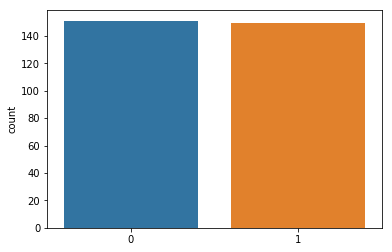

In [5]:
sns.countplot(y_train)

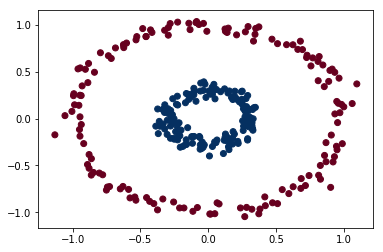

In [6]:
plt.scatter(*x_train.T, c=y_train, cmap='RdBu')

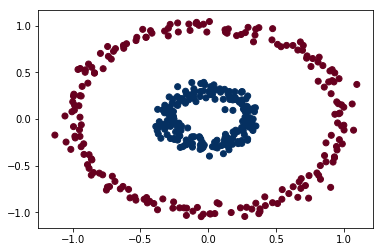

In [7]:
plt.scatter(*x.T, c=y, cmap='RdBu')
(l, r), (d, u) = plt.xlim(), plt.ylim()
bounds = (l, r, d, u)

In [8]:
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid', name='Predictions'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
Predictions (Dense)          (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

In [12]:
model.evaluate(x_train, y_train)

300/300 [==============================] - 0s 31us/step


[0.0023751523873458305, 1.0]

In [13]:
model.evaluate(x_test, y_test)

100/100 [==============================] - 0s 23us/step


[0.0016602177778258919, 1.0]

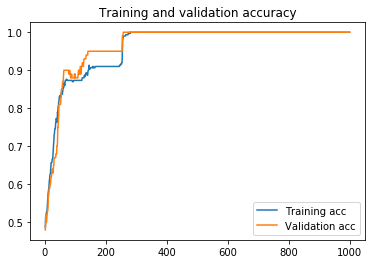

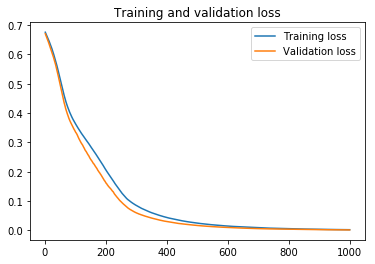

In [14]:
plot_history(history)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f121427e470>)

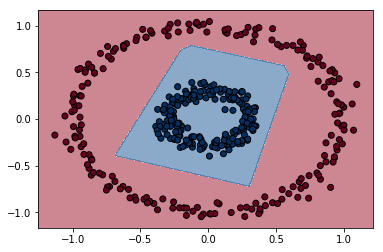

In [15]:
plot_decision_boundary(x, y, model, bounds)

In [16]:
x, y = make_gaussian_quantiles(n_samples=400, cov=1, random_state=45)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
y_train_ohc = to_categorical(y_train)
y_test_ohc = to_categorical(y_test)

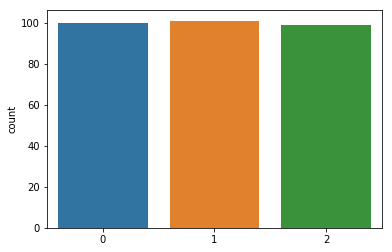

In [18]:
sns.countplot(y_train)

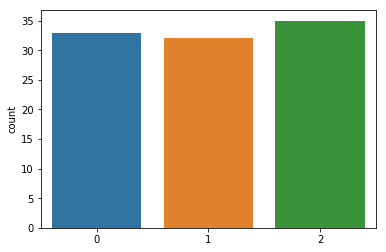

In [19]:
sns.countplot(y_test)

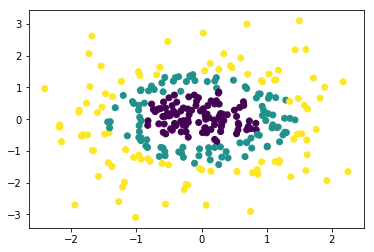

In [20]:
plt.scatter(*x_train.T, c=y_train)

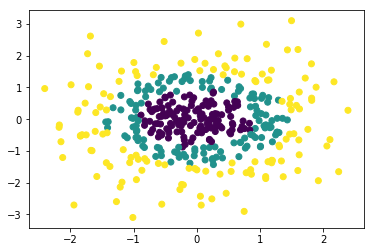

In [21]:
plt.scatter(*x.T, c=y)
(l, r), (d, u) = plt.xlim(), plt.ylim()
bounds = (l, r, d, u)

In [22]:
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax', name='Predictions'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
Predictions (Dense)          (None, 3)                 18        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train_ohc, validation_data=(x_test, y_test_ohc), epochs=1000, verbose=0)

In [26]:
model.evaluate(x_train, y_train_ohc)

300/300 [==============================] - 0s 28us/step


[0.063063951532046, 0.9766666674613953]

In [27]:
model.evaluate(x_test, y_test_ohc)

100/100 [==============================] - 0s 24us/step


[0.11225569516420364, 0.96]

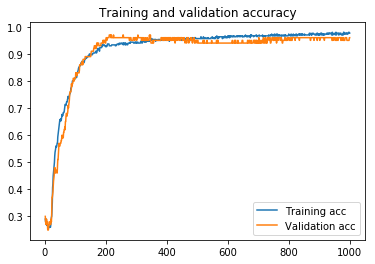

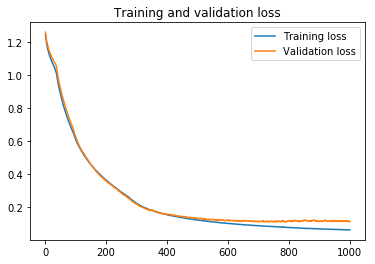

In [28]:
plot_history(history)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f11d374c7f0>)

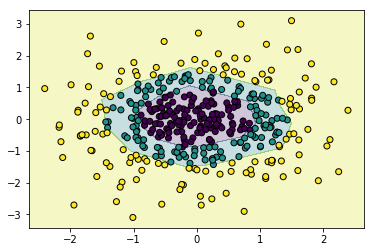

In [29]:
plot_decision_boundary(x, y, model, bounds, cmap=None, alpha=0.25, steps=2000)

In [30]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model)
sess = K.get_session()

In [31]:
fgsm = FastGradientMethod(ch_model, sess=sess)
fgsm_params = {'eps': 0.2}
adv = fgsm.generate_np(x_test, **fgsm_params)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [32]:
model.evaluate(adv, y_test_ohc)

100/100 [==============================] - 0s 27us/step


[1.8552749538421631, 0.5]

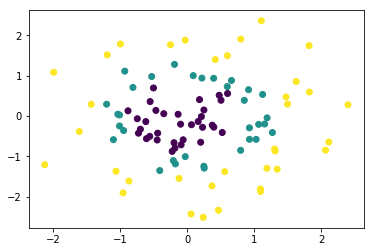

In [33]:
plt.scatter(*x_test.T, c=y_test)

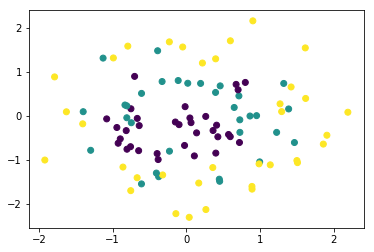

In [34]:
plt.scatter(*adv.T, c=y_test)

In [88]:
grads = K.gradients(model.output, model.input)[0]

In [89]:
iterate = K.function([model.input], [grads])

In [90]:
grad_vals = iterate([x_test])[0]

In [91]:
grad_vals[1]

array([ 8.4754987e-07, -2.8003271e-07], dtype=float32)

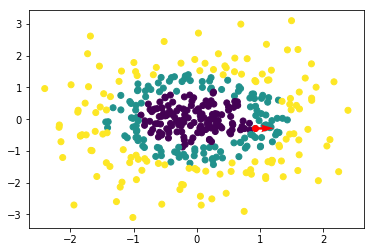

In [104]:
i = 0
plt.scatter(*x.T, c=y)
plt.scatter(*x_test[i], c='red')
plt.quiver(*x_test[i], *grad_vals[i], color='red')

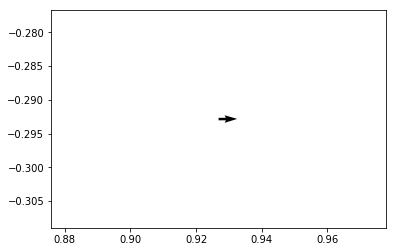

In [84]:
plt.quiver(*x_test[0], *grad_vals[0])

In [94]:
model.total_loss

<tf.Tensor 'loss_1/mul:0' shape=() dtype=float32>

In [101]:
model.optimizer.get_gradients(model.total_loss, model.input)

[<tf.Tensor 'gradients_10/dense_3/MatMul_grad/MatMul:0' shape=(?, 2) dtype=float32>]

In [103]:
K.gradients(model.output, model.input)[0]

<tf.Tensor 'gradients_12/dense_3/MatMul_grad/MatMul:0' shape=(?, 2) dtype=float32>

In [106]:
model.sample_weights

[<tf.Tensor 'Predictions_sample_weights_1:0' shape=(?,) dtype=float32>]